# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime



# Import API key
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")


In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#Define empty lists to store values
cloudy = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
win_spd = []
city_name = []

#Looping through cities 
x = 1
for city in cities:
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data skipped by try and except  
    try:
        
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"]) 
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        win_spd.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {x}|{city}")
        x += 1
    except (KeyError):
        print("City not found. Skipping.")

Processing record 1|ushuaia
Processing record 2|nosy varika
Processing record 3|broken hill
Processing record 4|torbay
Processing record 5|chifeng
Processing record 6|sfantu gheorghe
Processing record 7|atuona
Processing record 8|bengkulu
Processing record 9|mataura
Processing record 10|albany
Processing record 11|kapaa
Processing record 12|bethel
Processing record 13|norman wells
Processing record 14|jinchang
Processing record 15|hobart
Processing record 16|speightstown
City not found. skipping.
Processing record 17|voh
Processing record 18|saldanha
Processing record 19|la paz
Processing record 20|barrow
City not found. skipping.
City not found. skipping.
Processing record 21|naze
Processing record 22|geraldton
Processing record 23|punta arenas
Processing record 24|sosnovka
Processing record 25|lincoln
Processing record 26|new norfolk
Processing record 27|mikhaylovskoye
Processing record 28|bilibino
City not found. skipping.
Processing record 29|altamont
Processing record 30|hanna
Pro

Processing record 249|seoul
Processing record 250|cap malheureux
Processing record 251|korla
Processing record 252|eydhafushi
Processing record 253|kupang
City not found. skipping.
Processing record 254|loandjili
Processing record 255|buraydah
Processing record 256|ajdabiya
Processing record 257|jimma
Processing record 258|lewiston
City not found. skipping.
Processing record 259|nantucket
Processing record 260|kahului
Processing record 261|dikson
Processing record 262|bitam
Processing record 263|airai
Processing record 264|vila franca do campo
Processing record 265|waitati
Processing record 266|qaanaaq
Processing record 267|anchorage
Processing record 268|billings
Processing record 269|krutikha
Processing record 270|hamilton
Processing record 271|makakilo city
City not found. skipping.
Processing record 272|urucara
Processing record 273|arona
Processing record 274|inuvik
Processing record 275|yavatmal
Processing record 276|tabas
Processing record 277|puerto baquerizo moreno
Processing 

Processing record 493|murgab
Processing record 494|mangai
Processing record 495|touros
Processing record 496|ribeira grande
Processing record 497|samana
Processing record 498|zaraza
Processing record 499|lashio
Processing record 500|gashua
City not found. skipping.
Processing record 501|shumikha
Processing record 502|namibe
Processing record 503|kirakira
Processing record 504|kupiskis
Processing record 505|wasilla
Processing record 506|eisenerz
Processing record 507|rabo de peixe
Processing record 508|mujiayingzi
Processing record 509|dunaszekcso
City not found. skipping.
Processing record 510|daru
Processing record 511|mocajuba
Processing record 512|dunedin
City not found. skipping.
Processing record 513|marsta
Processing record 514|antofagasta
Processing record 515|urgut
Processing record 516|la tuque
Processing record 517|innisfail
Processing record 518|abu samrah
Processing record 519|north bend
Processing record 520|acarau
Processing record 521|warrnambool
Processing record 522|ca

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudy, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Latitude":lat,
                        "Longitude":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":win_spd
                                         })
city_df = city_df.rename_axis('City ID')
pd.to_datetime(city_df["Date"])
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Ushuaia,75,AR,1630093926,52,-54.8000,-68.3000,42.42,16.11
1,Nosy Varika,43,MG,1630093926,85,-20.5833,48.5333,66.36,3.49
2,Broken Hill,2,AU,1630093927,52,-31.9500,141.4333,42.51,10.36
3,Torbay,90,CA,1630093927,91,47.6666,-52.7314,66.27,24.16
4,Chifeng,0,CN,1630093844,71,42.2683,118.9636,55.78,8.41


In [7]:
city_df.to_csv("../output_data/city.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
test_df = city_df["Humidity"].describe(include = "all")
print("The maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_df.head()

The maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    565.000000
mean      71.612389
std       21.280219
min        8.000000
25%       60.000000
Name: Humidity, dtype: float64

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

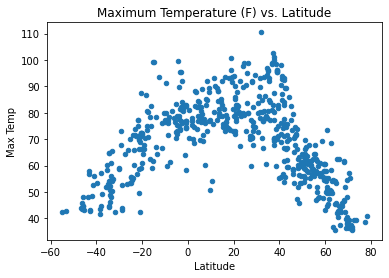

In [11]:
lat_vs_temp = city_df.plot(kind="scatter", x="Latitude", y="Max Temp", 
                                      title="Maximum Temperature (F) vs. Latitude")
lat_vs_temp
lat_vs_temp.get_figure().savefig("../output_data/Temp_vs_Latitude_of_Cities.png")

## Latitude vs. Humidity Plot

<AxesSubplot:title={'center':'Humidity (%) vs. Latitude'}, xlabel='Latitude', ylabel='Humidity'>

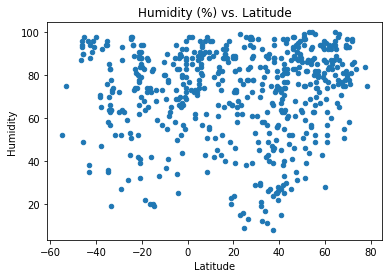

In [12]:
lat_vs_humidity = city_df.plot(kind="scatter", x="Latitude", y="Humidity", 
                                      title="Humidity (%) vs. Latitude")
lat_vs_humidity

## Latitude vs. Cloudiness Plot

<AxesSubplot:title={'center':'Cloudiness vs. Latitude'}, xlabel='Latitude', ylabel='Cloudiness'>

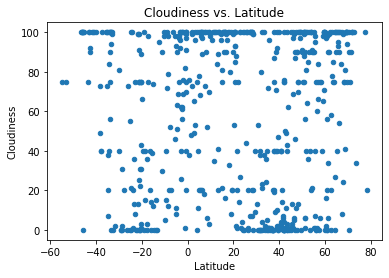

In [13]:
lat_vs_cloudy = city_df.plot(kind="scatter", x="Latitude", y="Cloudiness", 
                                      title="Cloudiness vs. Latitude")
lat_vs_cloudy

## Latitude vs. Wind Speed Plot

<AxesSubplot:title={'center':'Wind Speed vs. Latitude'}, xlabel='Latitude', ylabel='Wind Speed'>

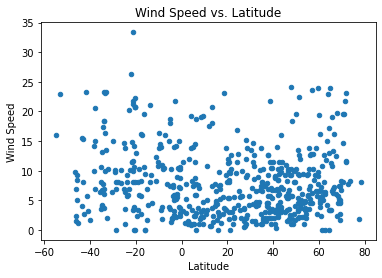

In [14]:
lat_vs_wind = city_df.plot(kind="scatter", x="Latitude", y="Wind Speed", 
                                      title="Wind Speed vs. Latitude")
lat_vs_wind

In [15]:
#saved plots
lat_vs_humidity.get_figure().savefig("../output_data/Humidity_vs_Latitude_of_Cities.png")
lat_vs_cloudy.get_figure().savefig("../output_data/Cloudiness_vs_Latitude_of_Cities.png")
lat_vs_wind.get_figure().savefig("../output_data/Wind_Speed_vs_Latitude_of_Cities.png")

## Linear Regression

In [34]:
def linear_reg (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    reg_value = x_values * slope + intercept
    eq = 'y = ' + str(round(slope, 2)) + 'x = ' + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, reg_value,"r-")
    plt.annotate(eq,(x_values.median(), y_values.median()) , fontsize = 12, color = 'orange')
    plt.xlabel('Latitude')
    print(f'The r-squared is: {rvalue}')
    plt.show()

In [35]:
n_hemisphere = city_df.loc[city_df['Latitude'] > 0]
s_hemisphere = city_df.loc[city_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.709729508244278


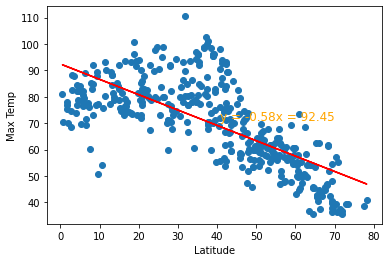

None


In [36]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Max Temp']
plt.ylabel('Max Temp')
print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7960760660957654


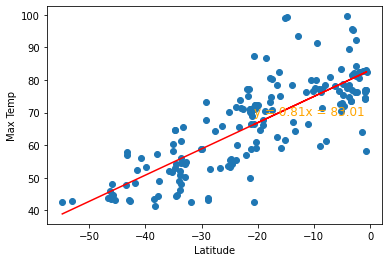

None


In [37]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Max Temp']
plt.ylabel('Max Temp')
print(linear_reg(x_values, y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10151244155150607


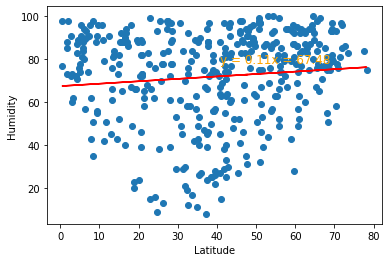

None


In [38]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Humidity']
plt.ylabel('Humidity')
print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06579453566715737


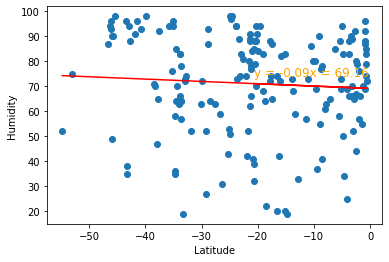

None


In [39]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Humidity']
plt.ylabel('Humidity')
print(linear_reg(x_values, y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.011279170458833435


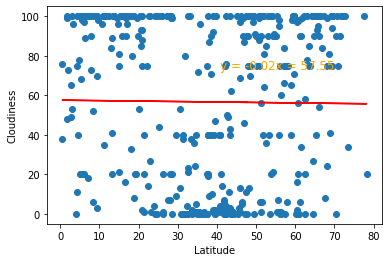

None


In [40]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Cloudiness']
plt.ylabel('Cloudiness')
print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.06490450150141151


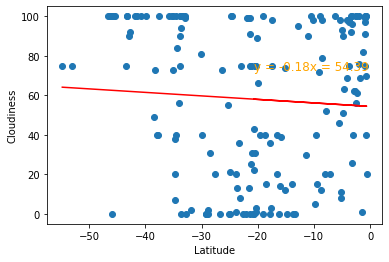

None


In [41]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Cloudiness']
plt.ylabel('Cloudiness')
print(linear_reg(x_values, y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16774935194732135


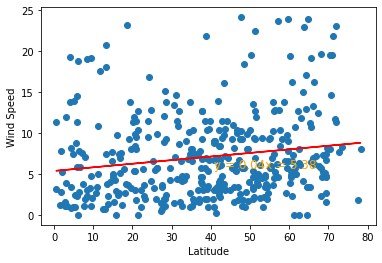

None


In [42]:
x_values = n_hemisphere['Latitude']
y_values = n_hemisphere['Wind Speed']
plt.ylabel('Wind Speed')
print(linear_reg(x_values, y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12126515997079305


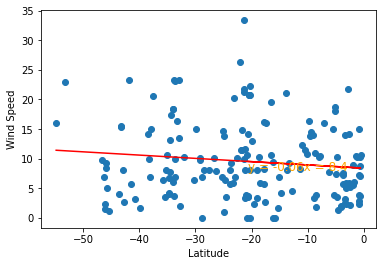

None


In [43]:
x_values = s_hemisphere['Latitude']
y_values = s_hemisphere['Wind Speed']
plt.ylabel('Wind Speed')
print(linear_reg(x_values, y_values))